# Данные

In [ ]:
import pandas as pd

# csv-файл есть по ссылке: https://disk.yandex.ru/d/2g3zn7JyuhUBLQ

# from google.colab import drive
# drive.mount('/content/drive')
data_flats = pd.read_csv('/content/drive/MyDrive/MathsHub/EDA_files/flats_moscow.csv')
data_flats.drop(columns = ['code'], inplace=True)

data_flats.head(5)

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
0,1,81,58,40,6.0,12.5,7,1,1,1
1,2,75,44,28,6.0,13.5,7,1,0,1
2,3,128,70,42,6.0,14.5,3,1,1,1
3,4,95,61,37,6.0,13.5,7,1,0,1
4,5,330,104,60,11.0,10.5,7,0,1,1


price &mdash;
цена квартиры в $1000

totsp &mdash;
общая площадь квартиры, кв.м.

livesp &mdash;
жилая площадь квартиры, кв.м.

kitsp &mdash;
площадь кухни, кв.м.

dist &mdash;
расстояние от центра в км.

metrdist &mdash;
расстояние до метро в минутах

walk &mdash;
1: пешком от метро, 0: на транспорте

brick &mdash;
1: кирпичный, монолит ж/б, 0: другой

floor &mdash;
1: этаж кроме первого и последнего, 0: иначе.

In [ ]:
data_flats.describe()

,Unnamed: 0,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1020.500000,127.496569,73.084314,46.337255,8.898529,11.015686,8.117157,0.685784,0.323039,0.790686
std,589.041594,51.878220,15.123450,7.894348,2.787073,3.375539,3.815574,0.464317,0.467752,0.406918
min,1.000000,50.000000,44.000000,28.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000
25%,510.750000,95.000000,62.000000,42.000000,7.000000,9.000000,5.000000,0.000000,0.000000,1.000000
50%,1020.500000,115.000000,73.500000,45.000000,9.000000,12.000000,7.000000,1.000000,0.000000,1.000000
75%,1530.250000,142.000000,79.000000,50.000000,10.000000,13.500000,10.000000,1.000000,1.000000,1.000000
max,2040.000000,730.000000,192.000000,102.000000,25.000000,17.000000,20.000000,1.000000,1.000000,1.000000


# Графики

### Гистограммы частот:

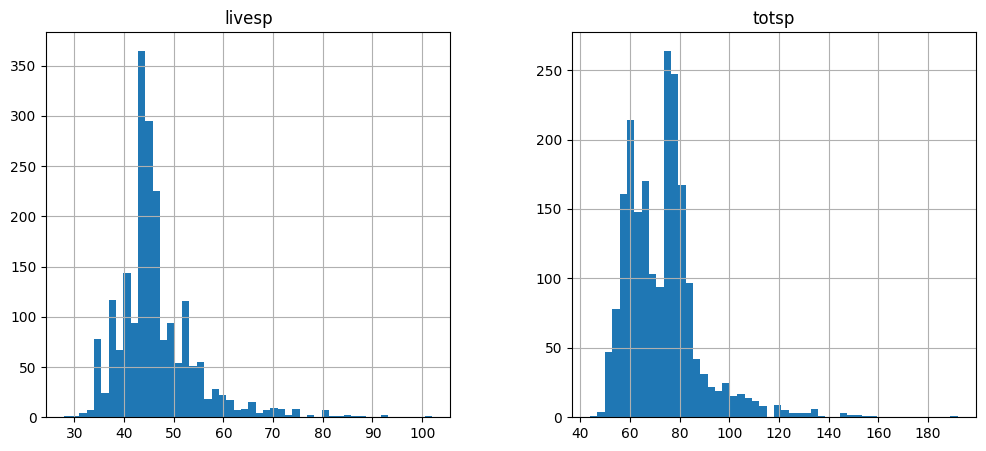

In [ ]:
# Посмотрим на две переменные:
data_flats.hist(['livesp', 'totsp'], bins=50, figsize=(12, 5));    # by = 'brick', legend=True

### Бокс-плот *aka* Диаграмма размаха *aka* Ящик с усами

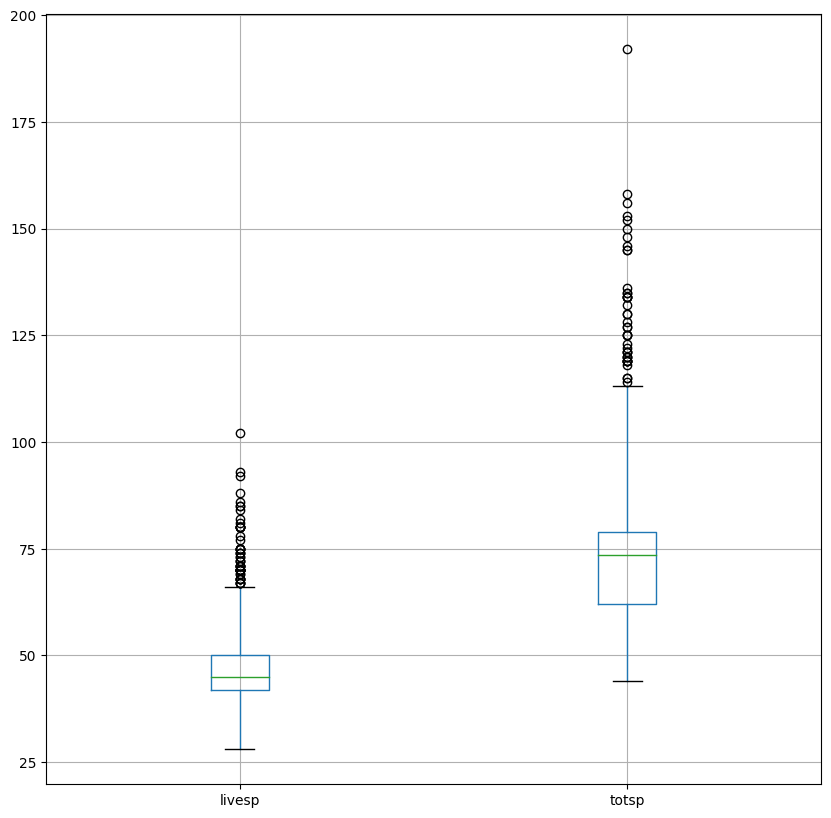

In [ ]:
# и построим для них бокс-плоты
data_flats.boxplot(['livesp', 'totsp'], figsize=(10,10), whis=2);    # , whis=(0,100)), by = ['brick']

# whis = whiskers: если одно число, то сколько IQR отступить влево от Q1 и вправо от Q3
# если два числа -- то процентили, на которых обрубать усы

### Правило трёх сигм:

In [ ]:
variable = 'totsp'

avg = data_flats[variable].mean()
std = data_flats[variable].std()

print('среднее минус три сигмы для', variable, ':', avg - 3*std)
print('среднее плюс три сигмы для', variable, ':', avg + 3*std)

среднее минус три сигмы для totsp : 27.71396433946522
среднее плюс три сигмы для totsp : 118.45466311151516


### Второй коэффициент скошенности Пирсона

Возьмём одну из переменных на графиках выше
и найдём для неё 2-й коэф-т скошенности Пирсона:

In [ ]:
variable = 'totsp'
med = data_flats[variable].median()
avg = data_flats[variable].mean()
print('медиана:', med, 'среднее:', avg)
std = data_flats[variable].std()
print('Второй коэффициент скошенности Пирсона для', variable, 'равен', 3*(avg-med)/std)

медиана: 73.5 среднее: 73.08431372549019
Второй коэффициент скошенности Пирсона для totsp равен -0.08245862157148491


### Интерполяция для процентилей

In [ ]:
import numpy as np

data = pd.Series([0,15,20,30,40])

proc_25 = np.percentile(data, 30)
proc_75 = np.percentile(data, 75)
print(proc_25, proc_75)

16.0 30.0


### Интерполяция для 1 и 3 квартилей (и, следовательно, межквартильного размаха)

In [ ]:
from scipy import stats

data = pd.Series([0,1,2,3,5,6,11])

iqr = stats.iqr(data)
iqr

4.0

Почему 4, а не 5?

In [ ]:
import numpy as np

data = pd.Series([0,1,2,3,5,6,11])

proc_25 = np.percentile(data, 25)
proc_75 = np.percentile(data, 75)
print(proc_25, proc_75)

diff = proc_75 - proc_25
print(diff)

1.5 5.5
4.0


### Гистограммы

Гистограмма частот для переменной dist - расстояние от квартиры до центра города в км (значения разбиты на 30 одинаковых по ширине классов между минимальным и максимальным значениями)

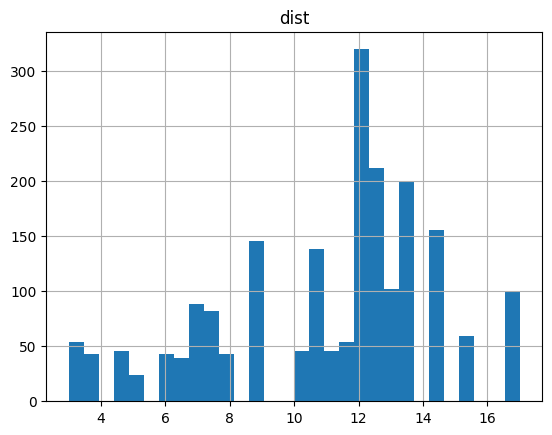

In [ ]:
data_flats.hist('dist', bins=30);

Гистограммы частот для переменной dist
(значения разбиты на несколько неодинаковых по ширине классов,
границы которых указаны в аргументе bins).

По выводу первой ячейки мы видели минимум и максимум для этой переменной,
поэтому знаем какие должны быть самая левая и правая границы.

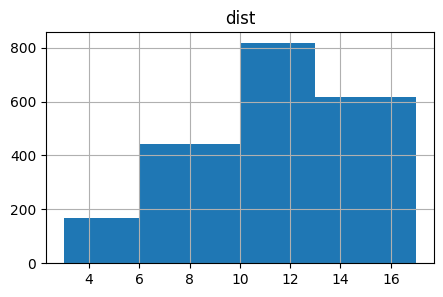

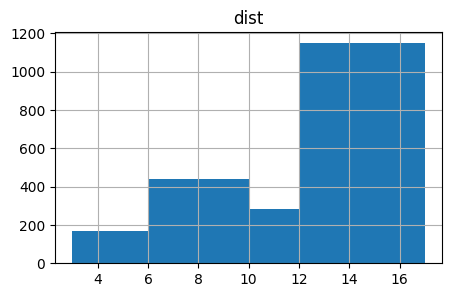

In [ ]:
data_flats.hist('dist', bins=[3, 6, 10, 13, 17], figsize=(5,3));
data_flats.hist('dist', bins=[3, 6, 10, 12, 17], figsize=(5,3));

Гистограммы плотностей для переменной dist
(те же варианты разбиения на классы значений)

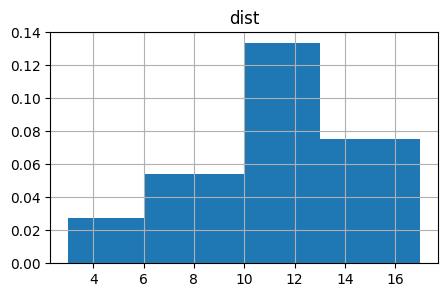

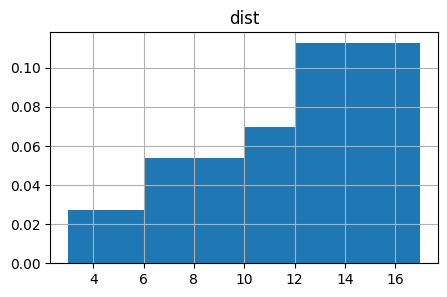

In [ ]:
data_flats.hist('dist', bins=[3, 6, 10, 13, 17], figsize=(5,3), density=True);
data_flats.hist('dist', bins=[3, 6, 10, 12, 17], figsize=(5,3), density=True);

Исчез провал на одном графике там, где пик у другого.

Если помнить, что тут частота отображается площадью, а не высотой столбцов, то видно, что разница между гистограммами уже не так велика.

# Практика №1 / дз №1 по курсу EDA

## Задача 1

Выберите две небинарных переменных из файла данных о московских квартирах.

Для каждой из выбранных переменных предлагается сделать следующее:
* Разбить на 10-20 классов и получить таблицу частот;
* Оценить по этой таблице среднее и медиану для выбранных переменных;
* Найти истинные среднее и медиану для выбранных переменных, и рассчитать ошибку оценки в % (ошибка в процентах = 100 * (оценка - истинное_значение) / истинное_значение)
* (*дополнительное задание*) Исследовать точность полученных оценок:
  * Что будет точнее оценено для одного и того же количества: среднее или медиана? Предположите чем обусловлена разница в точности или её отсутствие.
  * Будет ли ошибка уменьшаться или увеличиваться если разбивать на большее количество классов? Почему?
  * Для какой из двух выбранных переменных изменение ошибки с ростом количества классов более заметно? Если будет разница, предположите чем она обусловлена.

*([Ниже](#scrollTo=B-AH9JLli1xG&line=1&uniqifier=1) приведён код разбиения данных для переменной "расстояние квартиры от центра" на 10 равных по ширине классов и построения таблицы частот: сколько значений попало в каждый класс. Также указано как получить границы этих классов.)*

## Задача 2

На гистограмме отображено время, в минутах, которое потребовалось пловцам, чтобы проплыть 500 метров (по горизонтали время, по вертикали плотность частоты):
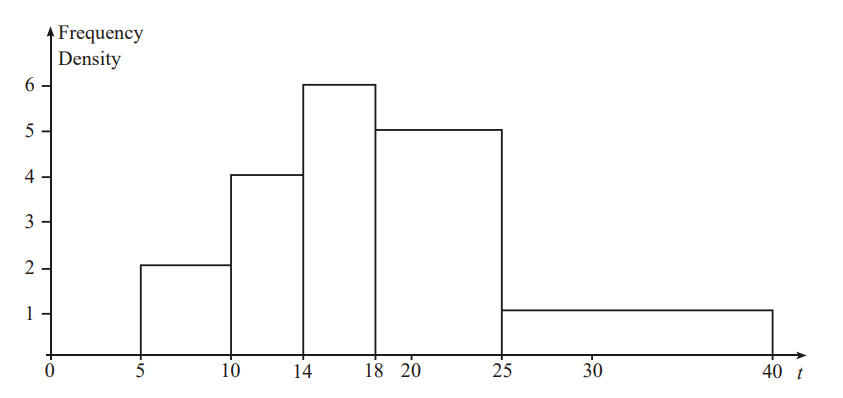

Неполная таблица частот для этого же набора данных выглядит так (верхний ряд - значения времени пловцов, нижний - частота):
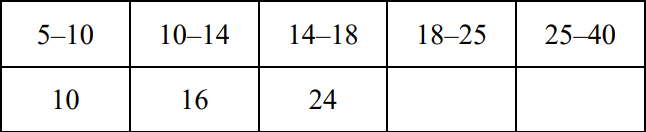

Дополните таблицу частот и оцените количество пловцов, время которых превышает 20 минут.
Покажите ваш расчёт (его можно сделать, например, в колабе).

## Может пригодиться для задачи 1

### Разбивка на интервалы и подсчёт их частот (результат в Series)

In [ ]:
data_flats['dist'].value_counts(bins=5, sort=False)

dist
(2.9850000000000003, 5.8]    167
(5.8, 8.6]                   295
(8.6, 11.4]                  376
(11.4, 14.2]                 887
(14.2, 17.0]                 315
Name: count, dtype: int64

### Разбивка на интервалы и подсчёт их частот (результат в DataFrame):

In [ ]:
bins_number = 5

bins_f = data_flats['dist'].value_counts(bins=bins_number, sort=False)

frequency_table = pd.DataFrame({'interval': bins_f.index, 'frequency': bins_f.values})

print('Таблица частот для ', bins_number, ' классов:')
display(frequency_table)

Таблица частот для  5  классов:


,interval,frequency
0,"(2.9850000000000003, 5.8]",167
1,"(5.8, 8.6]",295
2,"(8.6, 11.4]",376
3,"(11.4, 14.2]",887
4,"(14.2, 17.0]",315


В столбце интервалов &mdash; паднасовские интервалы:

In [ ]:
type(frequency_table['interval'][0])

pandas._libs.interval.Interval

Как обратиться к границам интервалов в полученном датафрейме:

In [ ]:
print('левые границы ', bins_number, ' классов:')
for i in range(len(frequency_table)):
  print(frequency_table['interval'][i].left)

print('\n')

print('Правые границы ', bins_number, ' классов:')
for i in range(len(frequency_table)):
  print(frequency_table['interval'][i].right)

левые границы  5  классов:
2.9850000000000003
5.8
8.6
11.4
14.2


Правые границы  5  классов:
5.8
8.6
11.4
14.2
17.0
